# 绘图和可视化

进行信息丰富的可视化（有时称为绘图）是数据分析中最重要的任务之一。它可能是探索过程的一部分，例如，帮助识别异常值或所需的数据转换，或作为生成模型想法的方式。 对于其他人而言，为网页构建交互式可视化可能是最终目标。 Python有许多用于进行静态或动态可视化的附加库，但我将主要关注matplotlib及其基础上的库。

matplotlib是一个桌面绘图软件包，旨在创建（主要是二维的）出版质量的绘图。该项目由John Hunter于2002年启动，旨在在Python中启用类似于MATLAB的绘图界面。matplotlib和IPython社区已经合作简化了IPython shell（现在是Jupyter笔记本）中的交互式绘图。matplotlib在所有操作系统上都支持各种GUI后端，并且还可以将可视化导出到所有常见的矢量和栅格图形格式（PDF，SVG，JPG，PNG，BMP，GIF等）。除了一些图表外，本书中几乎所有图形都是使用matplotlib制作的。

随着时间的推移，matplotlib催生了许多用于数据可视化的附加工具箱，这些工具箱使用matplotlib进行基础绘图。其中之一是seaborn，我们将在本章后面探讨。

遵循本章中的代码示例的最简单方法是在Jupyter笔记本中使用交互式绘图。要进行设置，请在Jupyter笔记本中执行以下语句：

In [1]:
%matplotlib notebook

## 9.1 简单的matplotlib API入门

对于matplotlib，我们使用以下导入约定：

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)

In [3]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


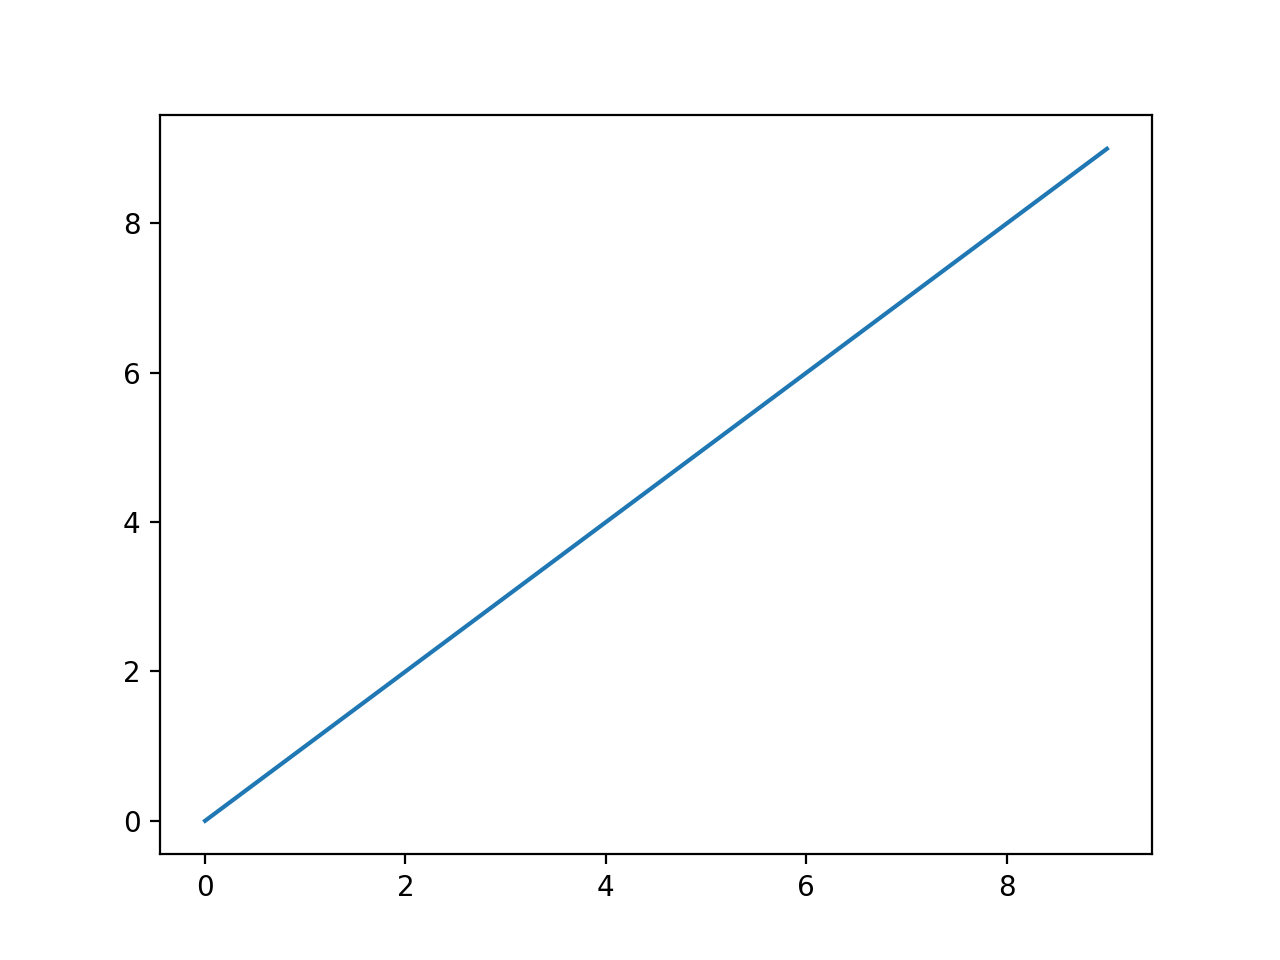

In [4]:
plt.plot(data)

虽然像seaborn和pandas的内置绘图功能之类的库将处理制作绘图的许多普通细节，但如果您希望在提供的功能选项之外对其进行自定义，则需要了解有关matplotlib API的一些知识。

> 注意：书中没有足够的空间来全面讨论matplotlib中功能的广度和深度。足以教您如何起床并运行。 matplotlib库和文档是学习高级功能的最佳资源。

### 图和子图

matplotlib中的图位于Figure对象中。您可以使用plt.figure来创建一个新的图：

<IPython.core.display.Javascript object>


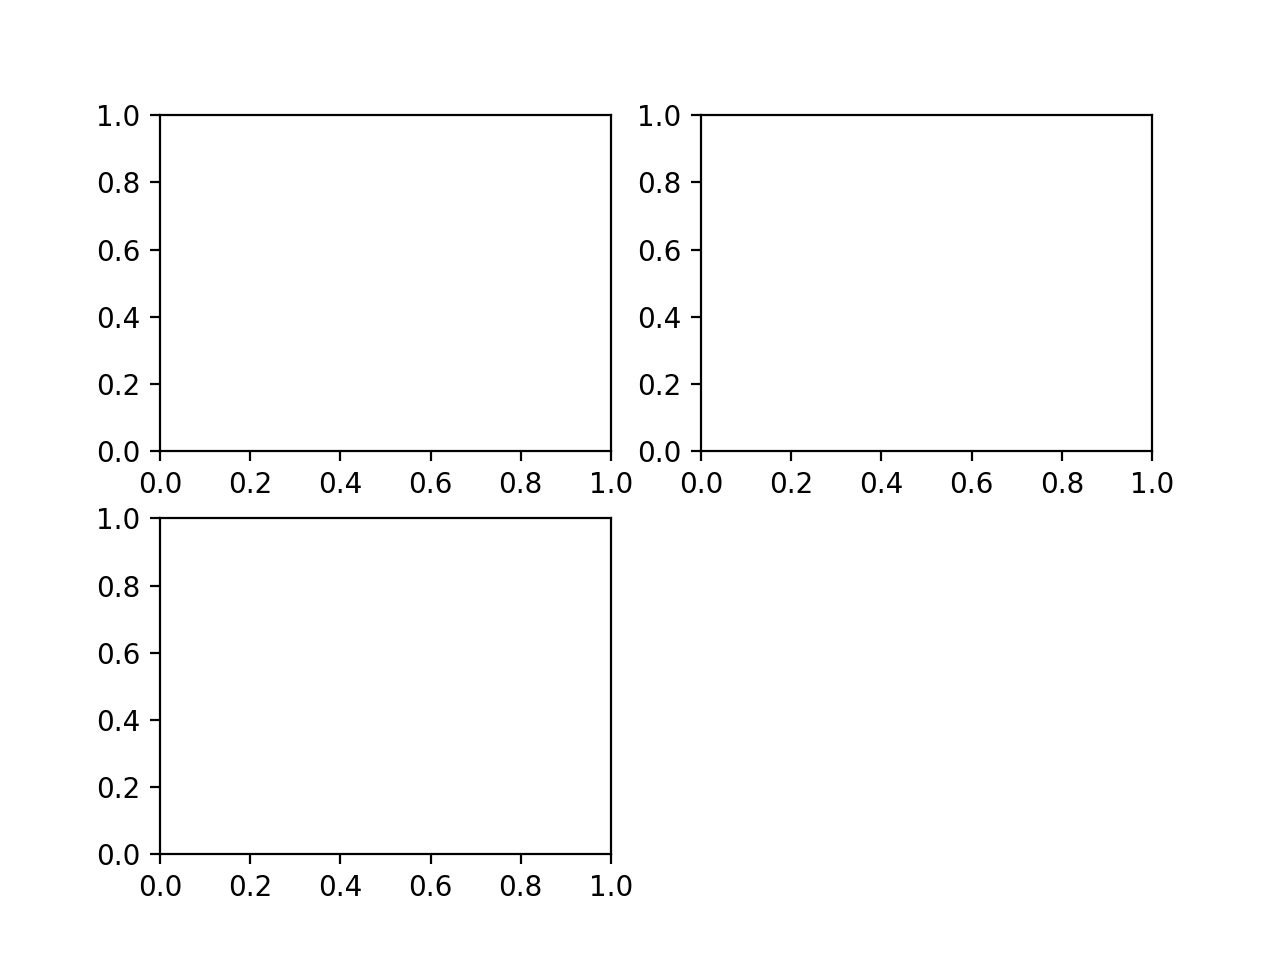

In [9]:
fig = plt.figure()

在IPython中，将出现一个空的绘图窗口，但是在Jupyter中，直到我们使用更多命令之前，什么都不会显示。plt.figure有很多选择；值得注意的是，如果将其保存到磁盘，figsize将保证该图形具有一定的尺寸和纵横比。

您无法使用空白图形进行绘图。您必须使用add_subplot创建一个或多个子图：

In [10]:
ax1 = fig.add_subplot(2, 2, 1)

这意味着该图应为2×2（总共最多四个图），并且我们选择四个子图中的第一个（从1编号）。如果创建接下来的两个子图，最终将得到如图9-2所示的可视化效果：

In [11]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

> 注意：使用Jupyter笔记本的一个细微差别是，在评估了每个单元格之后便会重设绘图，因此对于更复杂的绘图，必须将所有绘图命令放在单个笔记本电脑单元中。

在这里，我们在同一单元格中运行所有这些命令：

<IPython.core.display.Javascript object>


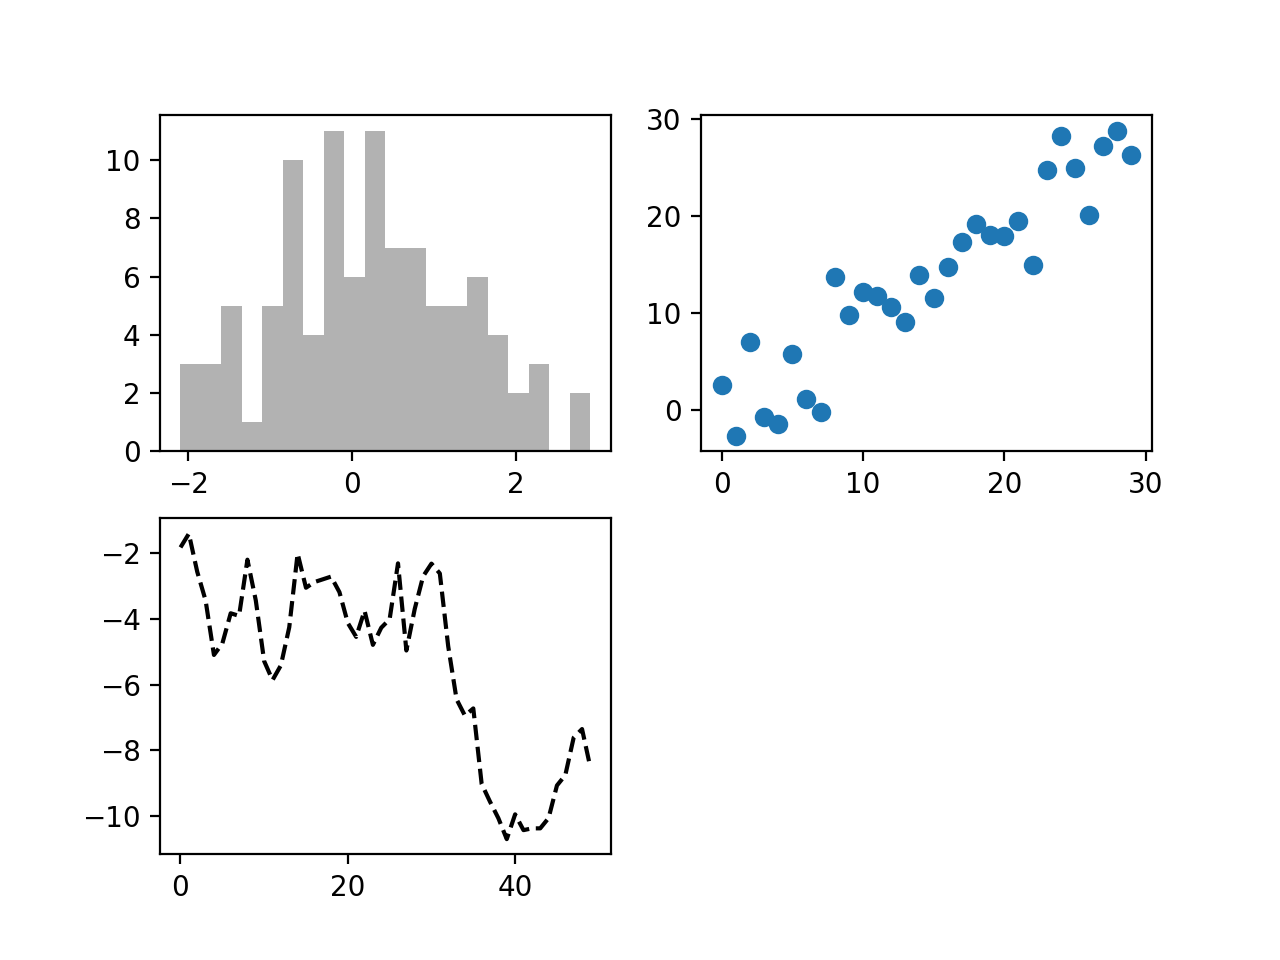

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

发出诸如plt.plot([1.5，3.5，-2，1.6])之类的绘图命令时，matplotlib会使用最后使用的图形和子图（如有必要，创建一个子图），从而隐藏图形和子图的创建。 因此，如果我们添加以下命令，您将得到如图9-3所示的内容：

In [25]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

'k--'是一种样式选项，指示matplotlib绘制黑色虚线。这里由fig.add_subplot返回的对象是AxesSubplot对象，可以通过调用每个对象的实例方法直接在其上绘制其他空子图（见图9-4）：

In [26]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [27]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

您可以在matplotlib文档中找到完整的绘图类型目录。

用子图网格创建图形是一项非常常见的任务，因此matplotlib包含一个便捷方法plt.subplots，该方法创建一个新图并返回一个包含创建的子图对象的NumPy数组：

<IPython.core.display.Javascript object>


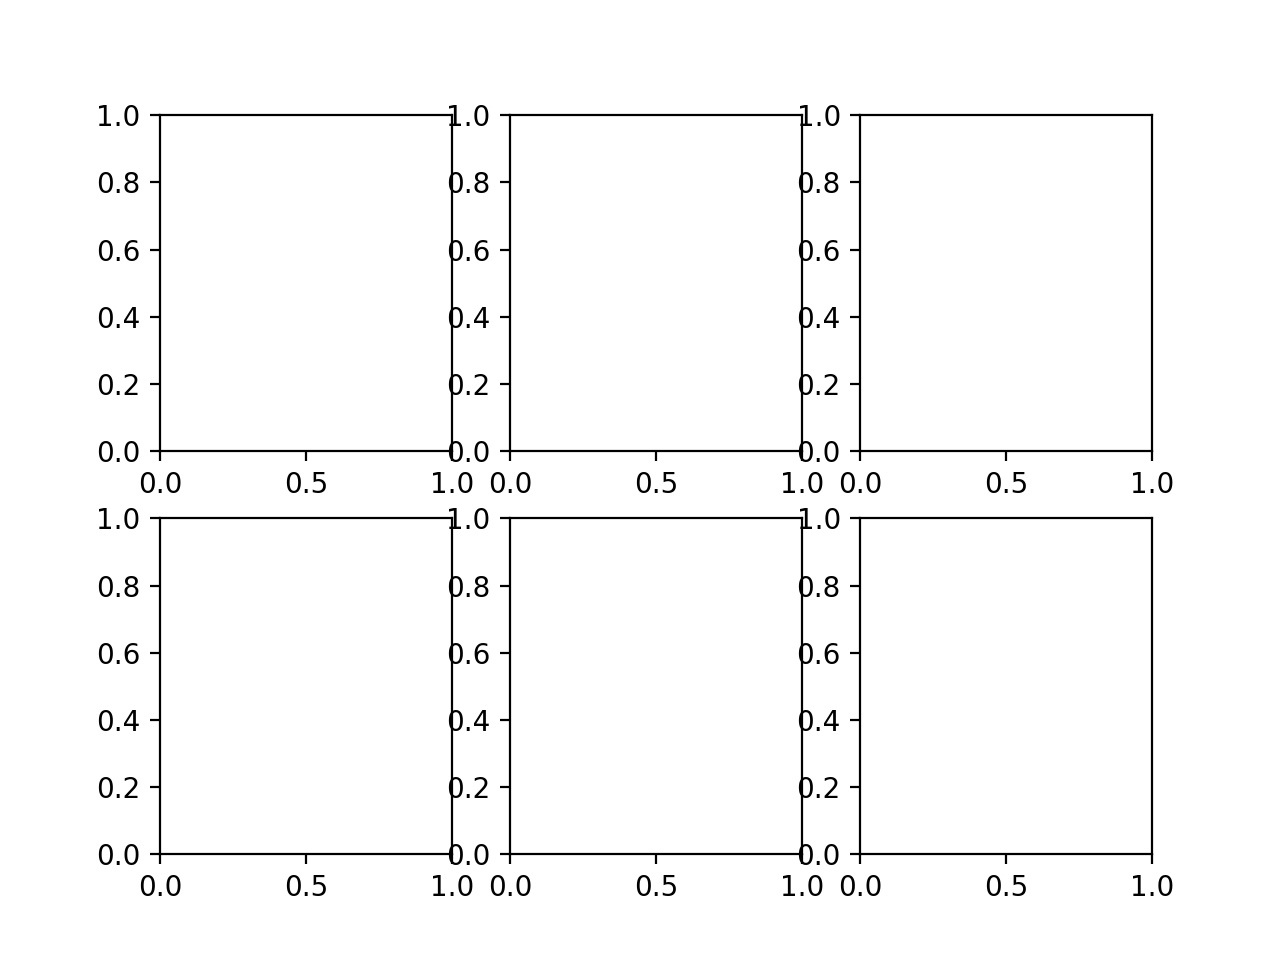

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb79d8f550>,
      dtype=object)

In [28]:
fig, axes = plt.subplots(2, 3)

axes

这非常有用，因为axes数组可以像二维数组一样轻松地索引； 例如，axes[0, 1]。 您还可以使用sharex和sharey分别指示子图具有相同的x轴或y轴。当您比较相同规模的数据时，此功能特别有用；否则，matplotlib将自动缩放绘图限制。有关此方法的更多信息，请参见表9-1。


#### 调整子图周围的间距

默认情况下，matplotlib在子图的外部和子图之间的间距周围留有一定数量的填充。相对于图的高度和宽度均指定了该间距，因此，如果您使用GUI窗口以编程方式或手动调整图的大小，则图将自动进行调整。您可以使用Figure对象上的subplots_adjust方法来更改间距，该方法也可以作为顶层函数使用：

```python
    subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=None)
```

wspace和hspace分别控制图形宽度和图形高度的百分比，以用作子图之间的间距。这是一个小示例，其中我将间距一直缩小到零（见图9-5）：

<IPython.core.display.Javascript object>


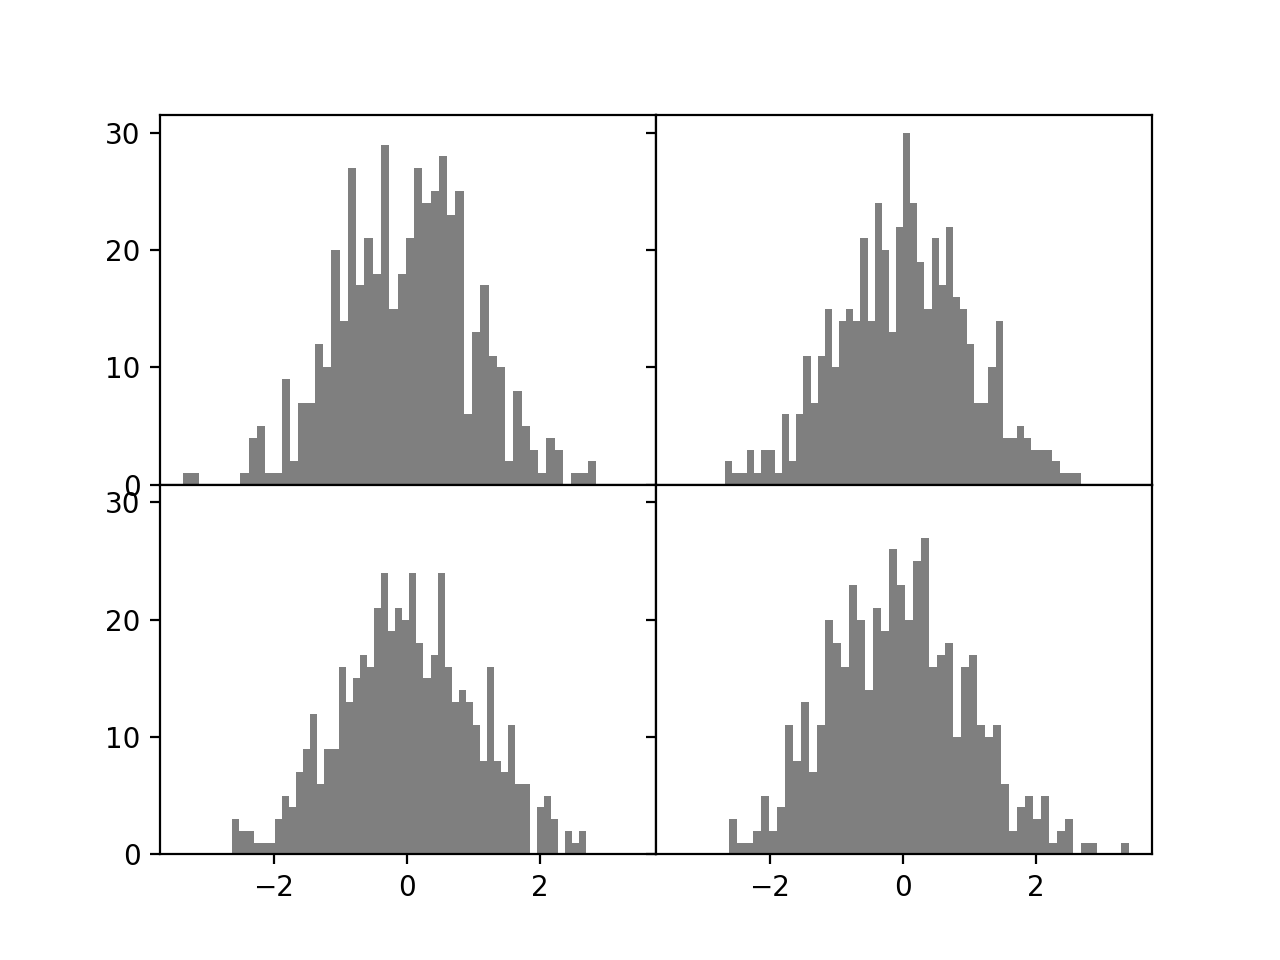

In [30]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

您可能会注意到轴标签重叠。matplotlib不会检查标签是否重叠，因此在这种情况下，您需要自己指定明确的刻度位置和刻度标签来修复标签（我们将在以下部分中介绍如何操作）。